# 1. Laboratory 7: Inexact Newton Method

## 1.2 Inexact Newton Method

In [197]:
module NewtonOptimizers
using LinearAlgebra

function conjugate_gradient(x₀, A, b, tol, k_max=1_000)
    x = x₀
    r = r₀ = b - A(x)
    d = r
    
    k = 1
    
    while k < k_max
         if norm(r) < tol
            break
        end
        
        z = A(d)
        
        α = (r'r)/(d'z)
        x = x + α*d
        
        r_old = copy(r)
        r = r_old - α*z
        
        β = (r'r)/(r_old'r_old)
        d = r + β*d
        
        k += 1
    end
    
    return x
end

# Newton method with constant step
function newton_method(x0, f, gradf, hvp, kmax, tollgrad, alpha, f_terms)
    k = 1
    xk = x0
    xseq = Vector{typeof(x0)}()
    gradfk = gradf(xk)
    push!(xseq, xk)
    
    while k < kmax
        norm_gradfk = norm(gradfk)
        if norm_gradfk < tollgrad
            break
        end
        
        eta_k = f_terms(gradf, xk, k)# superlinear convergence
        pk = conjugate_gradient(zeros(2), p -> hvp(xk, p), -gradfk, eta_k * norm_gradfk)
        
        xk = xk + alpha * pk
        k = k + 1
        gradfk = gradf(xk)
        push!(xseq, xk)
    end
    
    return xk, f(xk), gradfk, k, xseq
end
end
using Main.NewtonOptimizers

###############################################################################

f3(x) = (1-x[1])^2 + 100*(x[2]-x[1]^2)^2
gradf3(x) = [-2+2*x[1]+200*(x[2]-x[1]^2)*(-2*x[1]), 200*(x[2]-x[1]^2)]
hessf3(x) = [
    (2-400*x[2] + 1200*x[1]^2) (-400*x[1])
    (-400*x[1]) (200)
]
h3vp(x, p) =  hessf3(x) * p

###############################################################################

alpha = 1 # step length
kmax = 1_000 # max steps
tollgrad = 1e-12 # gradient norm stopping criterion
x0 = [-1.9, -5.9] # starting point

###############################################################################

using LinearAlgebra: norm

linear = (_, _, _) -> 0.5
superlinear = (gradf, xk, k) -> min(0.5, sqrt(norm(gradf(xk))))
quadratic = (gradf, xk, k) -> min(0.5, norm(gradf(xk)))

xk, fk, gradfk, k, xseq = NewtonOptimizers.newton_method(
    x0,
    f3, gradf3, h3vp,
    kmax, tollgrad, alpha,
    linear,
)
@show xk
@show fk
@show gradfk
@show k

xk, fk, gradfk, k, xseq = NewtonOptimizers.newton_method(
    x0,
    f3, gradf3, h3vp,
    kmax, tollgrad, alpha,
    superlinear,
)
@show xk
@show fk
@show gradfk
@show k

xk, fk, gradfk, k, xseq = NewtonOptimizers.newton_method(
    x0,
    f3, gradf3, h3vp,
    kmax, tollgrad, alpha,
    quadratic,
)
@show xk
@show fk
@show gradfk
@show k

xk = [0.9999999999999325, 0.9999999999998648]
fk = 4.5613909692141955e-27
gradfk = [-4.618527782441251e-14, -4.440892098500626e-14]
k = 21
xk = [1.0, 1.0]
fk = 0.0
gradfk = [0.0, 0.0]
k = 20


xk = [1.0, 1.0]
fk = 0.0
gradfk = [0.0, 0.0]
k = 19


19

In [168]:
using Plots

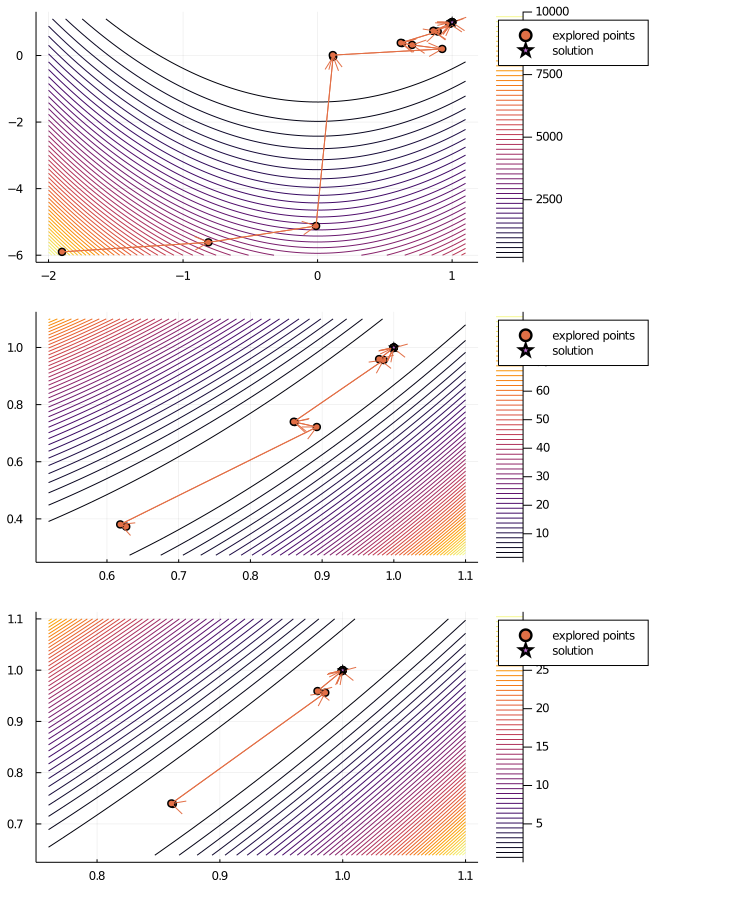

In [252]:
function plot_xseq(f3, xseq)
    minx1 = minimum([x[1] for x in xseq]) - 0.1
    maxx1 = maximum([x[1] for x in xseq]) + 0.1
    minx2 = minimum([x[2] for x in xseq]) - 0.1
    maxx2 = maximum([x[2] for x in xseq]) + 0.1
    contour(
        range(minx1, stop=maxx2, length=100), range(minx2, stop=maxx2, length=100),
        (x1, x2) -> f3([x1, x2]),
        label="f3",
#         levels=exp10.(range(-2, stop=log10(f3(xseq[1])), length=15)),
        levels=50,
        legend = :outertopright
    )
    scatter!([x[1] for x in xseq], [x[2] for x in xseq], label="explored points")
    quiver!(
        [x[1] for x in xseq[1:end-1]],
        [x[2] for x in xseq[1:end-1]],
        quiver=(
            [x[1] for x in xseq[2:end]] - [x[1] for x in xseq[1:end-1]],
            [x[2] for x in xseq[2:end]] - [x[2] for x in xseq[1:end-1]],
        ),
        c=2
    )
    scatter!([1], [1], label="solution", m=:star)
end

plot(
    plot_xseq(f3, xseq[1:end]),
    plot_xseq(f3, xseq[8:end]),
    plot_xseq(f3, xseq[11:end]),
    layout=(3,1),
    size = (750, 900),
)